In [1]:
# Use the following data for this assignment:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
tdf = df.transpose()
ddf = tdf.describe()

In [5]:
colors = {
    'below': (0.,0.,0.8),
    'above': (0.5,0.,0.),
    'exact': (1.,1.,1.)
}
wx = [1991.5,1992,1993,1994,1995,1995.5]
#plot_line = None

def calc_95_ci(entry):
    mean = entry['mean']
    z = 1.960
    std = entry['std']
    n = entry['count']
    diff = z*std/np.sqrt(n)
    return (mean - diff, mean + diff, diff)
    
def determine_bar(e):
    for i in range(0, len(x)):
        if e > x[i] - 0.5 and e <= x[i] + 0.5:
            return (i, x[i])
    return (0, x[0])
    
def set_bar_color(bar, color):
    bar.set_color(color)
    bar.set_edgecolor('black')
    
def onclick(event):
    _y = event.ydata
    #plot_line.remove()
    #plot_line, = plt.plot(wx, [_y for r in range(0, len(wx))], '-')
    set_colors(_y)
    plt.gca().set_title('Current value of interest: {}'.format(int(event.ydata)))

def set_colors(_y):
    for i in range(0, len(x)):
        ci_min = confidence_intervals[i][0]
        ci_max = confidence_intervals[i][1]
        if ci_min < _y:
            if ci_max >= _y:
                set_bar_color(bars[i], calc_color(i, _y))
            else:
                set_bar_color(bars[i], colors['below'])
        else:
            set_bar_color(bars[i], colors['above'])

def calc_color(index, _y):
    (min_y, max_y, diff) = confidence_intervals[index]
    if _y < min_y + diff: #below the median
        rate = (_y - min_y) / diff
        return colors['above'] + (1-rate,)#tuple((np.array(colors['exact']) - np.array(colors['below'])) * rate)
    else:
        rate = (max_y - _y) / diff
        return colors['below'] + (1-rate,)#tuple((np.array(colors['exact']) - np.array(colors['above'])) * rate)

<IPython.core.display.Javascript object>


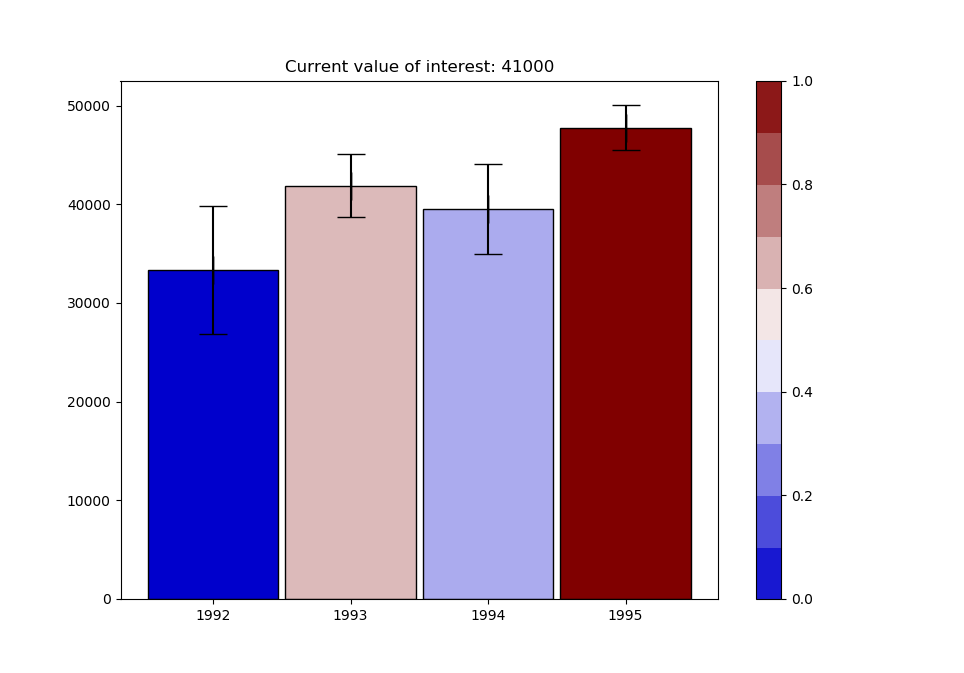

In [8]:
plt.figure()

step = 0.1
mymap = mpl.colors.LinearSegmentedColormap.from_list('hm',[colors['below'],colors['exact'],colors['above']])
Z = [[0,0],[0,0]]
levels = np.arange(0.,1.+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()
plt.colorbar(CS3)
plt.show()

x = [1992,1993,1994,1995]
y = ddf.loc['mean'].as_matrix()
plt.xticks(x)
bars = plt.bar(x, y, width=0.95)

for i, bar in enumerate(bars):
    bar.set_color('grey')
    bar.set_edgecolor('black')
    
confidence_intervals = [calc_95_ci(ddf[x[i]]) for i in range(0, len(x))]
    
for i in range(0, len(x)):
    plt.errorbar(x[i], y[i], xerr=0, yerr=confidence_intervals[i][2], capsize=10, color='black')

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

set_colors(41000)
plt.gca().set_title('Current value of interest: {}'.format(41000))
#plot_line, = plt.plot(wx, [41000 for i in range(0, len(wx))], '-')
#plot_line.remove()